In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy
import scipy.ndimage
from skimage.filters import threshold_otsu
from skimage.morphology import binary_dilation, binary_erosion
import skimage.morphology

## Δημιουργία συνάρτησης για την προσθήκη Gaussian noise στην εικόνα

Gaussian noise in digital images arise during acquisition e.g. sensor noise caused by poor illumination and/or high temperature, and/or transmission e.g. electronic circuit noise

In [2]:
def gaussian_noise(img,std):
    mean = 0.0   # some constant
    noisy_img = img + np.random.normal(mean, std, img.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)
    noisy_img_clipped = np.around(noisy_img_clipped) 
    noisy_img_clipped = np.asarray(noisy_img_clipped, dtype=np.uint8)
    
    return noisy_img_clipped

## Διαβάζουμε την εικόνα cameraman.tif και της προσθέτουμε θόρυβο

In [3]:
img = mpimg.imread('cameraman.tif')

gaussian_image = gaussian_noise(img,30)

## Φίλτρα Μέσης τιμής
Η λειτουργία του φίλτρου μέσης τιμής συνίσταται με την αντικατάσταση της φωτεινότητας κάθε pixel με την μέση φωτεινότητα της γειτονιάς του.

Τα φίλτρα μέσης τιμής είναι χαμηλοπερατά (lowpass) μιας και μειώνονται βαθμιαία οι απότομες αλλαγές στην ένταση των pixels.

Μειώνουμε τον τυχαίο θόρυβο, όμως χάνουμε συνήθως την ευκρίνεια στις ακμές της εικόνας (edge blurring - θόλωμα ακμών)

Ένα φίλτρο μέσης τιμής μπορεί να υλοποιηθεί πρακτικά με την χρήση μιας μάσκας

## Τι είναι οι μάσκες?
Μια μάσκα είναι στην ουσία ένα χωρικό φίλτρο. Το φιλτράρισμα πραγματοποιείται απευθείας στην εικόνα, με μετασχηματισμό των τιμών έντασης των pixel της με τη χρήση κάποιας συνάρτησης, η οποία χρησιμοποιεί την μάσκα (structuring element) για να πραγματοποιήσει τους υπολογισμούς που θα μας οδηγήσουν στο τελικό αποτέλεσμα

Πρακτικά, περνάμε την μάσκα από κάθε pixel της εικόνας, σημείο προς σημείο.

## Παράδειγμα χρήσης μάσκας 

### Δημιουργία binary εικόνας 

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


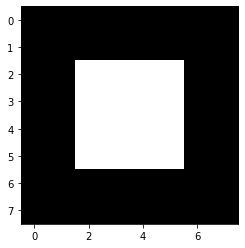

In [4]:
image_binary_1 = [[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]]

image_binary_1 = np.asarray(image_binary_1, dtype=np.bool)
image_binary_1 = np.asarray(image_binary_1, dtype=np.int32)

print(image_binary_1)

figure1 = plt.figure(1)
plt.imshow(image_binary_1,cmap="gray")


## Χρήση συναρτήσεων dilation και erosion 
Χρησιμοποιούν κάποιο structuring element (μάσκα)

Η dilation προσθέτει pixel στο περίγραμμα των αντικειμένων της εικόνας ενώ η erosion αφαιρεί pixel από το περίγραμμα των αντικειμένων

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


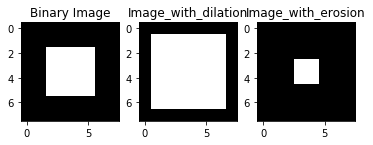

In [5]:
mask_square=np.ones((3,3))  #creates a 3x3 matrix of ones

print(mask_square)  #prints the 3x3 matrix mask

image_dilation = binary_dilation(image_binary_1, mask_square) #Dilation of the input by the structuring element.
image_erosion = binary_erosion(image_binary_1, mask_square) #Erosion of the input by the structuring element.


figure3 = plt.figure(3)

subplot1 = figure3.add_subplot(1,3,1)
plt.imshow(image_binary_1,cmap="gray")
subplot1.set_title('Binary Image')

subplot1 = figure3.add_subplot(1,3,2)
plt.imshow(image_dilation,cmap="gray")
subplot1.set_title('Image_with_dilation')

subplot1 = figure3.add_subplot(1,3,3)
plt.imshow(image_erosion,cmap="gray")
subplot1.set_title('Image_with_erosion')

figure1.tight_layout()

## Άλλες μάσκες που μπορείτε να χρησιμοποιήσετε

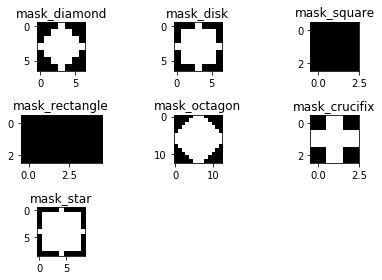

In [6]:
mask_diamond = skimage.morphology.diamond(3)   #Generates a flat, diamond-shaped structuring element.
mask_diamond = np.asarray(mask_diamond, dtype=np.int32)

mask_disk = skimage.morphology.disk(3)   #Generates a flat, disk-shaped structuring element.
mask_disk = np.asarray(mask_disk, dtype=np.int32)

mask_square = skimage.morphology.square(3)#Generates a flat, square-shaped structuring elementyou can also use mask_square=np.ones((3,3))
mask_square = np.asarray(mask_square, dtype=np.int32)   # you can also use: mask_square=np.ones((3,3))

mask_rectangle = skimage.morphology.rectangle(3,5)#Generates a flat, rectangular-shaped structuring element
mask_rectangle = np.asarray(mask_rectangle, dtype=np.int32) #you can also use: mask_rectangle=np.ones((3,5))

mask_octagon = skimage.morphology.octagon(3,5) # Generates an octagon shaped structuring element.
mask_octagon = np.asarray(mask_octagon, dtype=np.int32)

mask_crucifix = scipy.ndimage.generate_binary_structure(2, 1) # Generate a binary structure for binary morphological operations.
mask_crucifix = np.asarray(mask_crucifix, dtype=np.int32)

mask_star = skimage.morphology.star(3)  # Generates a star shaped structuring element
mask_star = np.asarray(mask_star, dtype=np.int32)



figure5 = plt.figure(5)

subplot1 = figure5.add_subplot(3,3,1)
plt.imshow(mask_diamond,cmap=plt.cm.gray)
subplot1.set_title('mask_diamond')

subplot1 = figure5.add_subplot(3,3,2)
plt.imshow(mask_disk,cmap=plt.cm.gray)
subplot1.set_title('mask_disk')

subplot1 = figure5.add_subplot(3,3,3)
plt.imshow(mask_square,cmap=plt.cm.gray)
subplot1.set_title('mask_square')

subplot1 = figure5.add_subplot(3,3,4)
plt.imshow(mask_rectangle,cmap=plt.cm.gray)
subplot1.set_title('mask_rectangle')

subplot1 = figure5.add_subplot(3,3,5)
plt.imshow(mask_octagon,cmap=plt.cm.gray)
subplot1.set_title('mask_octagon')

subplot1 = figure5.add_subplot(3,3,6)
plt.imshow(mask_crucifix,cmap=plt.cm.gray)
subplot1.set_title('mask_crucifix')

subplot1 = figure5.add_subplot(3,3,7)
plt.imshow(mask_star,cmap=plt.cm.gray)
subplot1.set_title('mask_star')

figure5.tight_layout()

## Δημιουργία φίλτρου μέσης τιμής 

In [7]:
filter_3_by_3 = np.ones((3,3))/9   # πίνακας 3x3 από άσσους (1), πολλαπλασιασμένος επί 1/9
filter_5_by_5 = np.ones((5,5))/25  # # πίνακας 5x5 από άσσους (1), πολλαπλασιασμένος επί 1/25

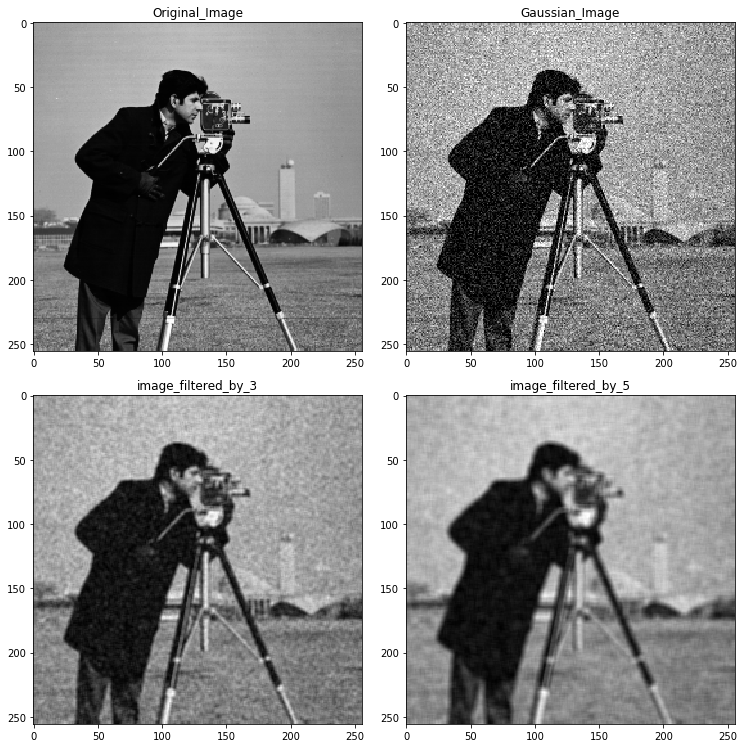

In [8]:
image_filtered_by_3 = scipy.ndimage.convolve(gaussian_image, filter_3_by_3) # Multidimensional convolution
                                                                        #The array is convolved with the given kernel
                                                                       #here we use as kernels the filters we created 
image_filtered_by_5 = scipy.ndimage.convolve(gaussian_image, filter_5_by_5)

figure1 = plt.figure(1, figsize=(10.5, 10.5))

subplot1 = figure1.add_subplot(2,2,1)
plt.imshow(img, cmap='gray')
subplot1.set_title('Original_Image')

subplot1 = figure1.add_subplot(2,2,2)
plt.imshow(gaussian_image, cmap='gray')
subplot1.set_title('Gaussian_Image')

subplot1 = figure1.add_subplot(2,2,3)
plt.imshow(image_filtered_by_3, cmap='gray')
subplot1.set_title('image_filtered_by_3')

subplot1 = figure1.add_subplot(2,2,4)
plt.imshow(image_filtered_by_5, cmap='gray')
subplot1.set_title('image_filtered_by_5')

figure1.tight_layout()

## Φτιάχνοντας το δικό μας φίλτρο μέσης τιμής

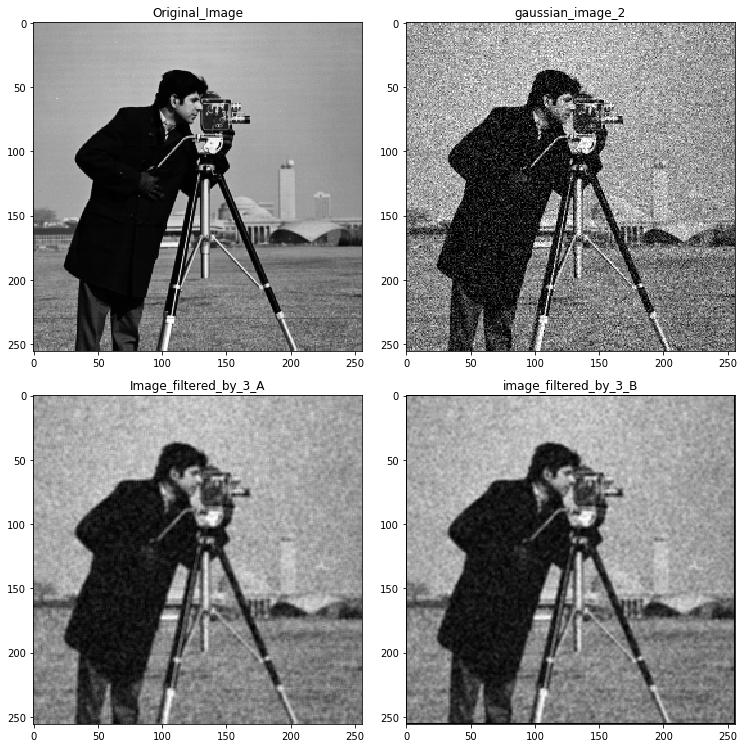

In [11]:
gaussian_image_2 = gaussian_noise(img,30)

filter_3_by_3_A = np.ones((3,3))/9

image_filtered_by_3_A = scipy.ndimage.convolve(gaussian_image_2, filter_3_by_3_A)

# Δημιουργία δικού μας φίλτρου μέση τιμής 

image_filtered_by_3_B = np.zeros(gaussian_image_2.shape)

for i in range (1, gaussian_image_2.shape[0] - 1):
    for k in range (1, gaussian_image_2.shape[1] - 1):
        image_filtered_by_3_B[i,k] = filter_3_by_3_A[0,0] * gaussian_image_2[i-1,k-1] + \
                                        filter_3_by_3_A[0,1] * gaussian_image_2[i-1,k] + \
                                        filter_3_by_3_A[0,2] * gaussian_image_2[i-1,k+1] + \
                                        filter_3_by_3_A[1,0] * gaussian_image_2[i,k-1] + \
                                        filter_3_by_3_A[1,1] * gaussian_image_2[i,k] +\
                                        filter_3_by_3_A[1,1] * gaussian_image_2[i,k] + \
                                        filter_3_by_3_A[1,2] * gaussian_image_2[i,k+1] + \
                                        filter_3_by_3_A[2,0] * gaussian_image_2[i+1,k-1] + \
                                        filter_3_by_3_A[2,1] * gaussian_image_2[i+1,k] + \
                                        filter_3_by_3_A[2,2] * gaussian_image_2[i+1,k+1] 
        
                                    
image_filtered_by_3_B = (image_filtered_by_3_B - np.min(image_filtered_by_3_B)) * 255/\
                            (np.max(image_filtered_by_3_B) - np.min(image_filtered_by_3_B))

image_filtered_by_3_B = np.around(image_filtered_by_3_B)
image_filtered_by_3_B = np.asarray(image_filtered_by_3_B, dtype=np.uint8)                                 
                            
figure2 = plt.figure(2, figsize=(10.5, 10.5))

subplot2 = figure2.add_subplot(2,2,1)
plt.imshow(img, cmap='gray')
subplot2.set_title('Original_Image')

subplot2 = figure2.add_subplot(2,2,2)
plt.imshow(gaussian_image, cmap='gray')
subplot2.set_title('gaussian_image_2')

subplot2 = figure2.add_subplot(2,2,3)
plt.imshow(image_filtered_by_3_A, cmap='gray')
subplot2.set_title('Image_filtered_by_3_A')

subplot2 = figure2.add_subplot(2,2,4)
plt.imshow(image_filtered_by_3_B, cmap='gray')
subplot2.set_title('image_filtered_by_3_B')

figure2.tight_layout()

## Άσκηση
1. Διαβάστε την εικόνα rice.png
2. Με τη χρήση ποιας μάσκας (structuring element και συνάρτηση) μπορούμε να βελτιώσουμε την ποιότητα των αντικειμένων που εμφανίζονται; Αιτιολογήστε την απάντησή σας
3. Εμφανίστε σε ένα figure με ένα sublot (με τις ανάλογες διαστάσεις) την αρχική εικόνα καθώς και τις εικόνες μετά την εφαρμογή της μάσκας
4. Αποθηκέυστε το αρχείο .ipynb με τον κώδικά σας, καθώς και το figure με τις δύο εικόνες
5. Ανεβάστε το συμπιεσμένο φάκελο με τα αρχεία σας στο eclass με όνομα div_lab5_AM.zip, όπου ΑΜ ο αριθμός μητρώου σας